In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

                 0
count    30.000000
mean   1426.666667
std     230.716027
min     900.000000
25%    1300.000000
50%    1350.000000
75%    1650.000000
max    1800.000000


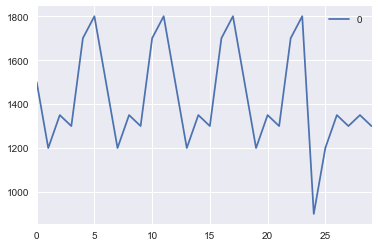

In [15]:
sales_april = pd.DataFrame([1500,1200,1350,1300,1700,1800,1500,1200,1350,1300,1700,1800, \
               1500,1200,1350,1300,1700,1800,1500,1200,1350,1300,1700,1800,900,1200,1350,1300,1350,1300])

print(sales_april.describe())
sales_april.plot()

/Users/carl/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


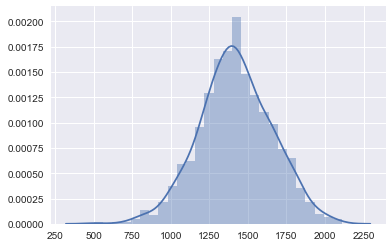

In [54]:
# How do we graph the normal distribution
apr_mean = sales_april.mean()
apr_std = sales_april.std()

sns.distplot(np.random.normal(apr_mean, apr_std, 1000))

In [70]:
import math

# Z-score * std / math.sqrt(n)
sample_size = 1.96 * apr_std / math.sqrt(30)
print(sample_size)


sample_size = 1.96 * apr_std / math.sqrt(365)
print("But if we had one year of data, we need a smaller sample!")
print(sample_size)


sample_size = 1.645 * apr_std / math.sqrt(30)
print("But if we are ok with a 90% confidence interval.")
print(sample_size)


sample_size = 1.645 * apr_std / math.sqrt(365)
print("And if we combine this with more historical data...")
print(sample_size)

0    82.56067
dtype: float64
But if we had one year of data, we need a smaller sample!
0    23.669408
dtype: float64
But if we are ok with a 90% confidence interval.
0    69.291991
dtype: float64
And if we combine this with more historical data...
0    19.865396
dtype: float64


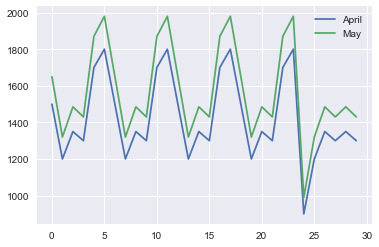

In [76]:
sales_may = pd.DataFrame([1650,1320,1485,1430,1870,1980,1650,1320,1485,1430, \
             1870,1980,1650,1320,1485,1430,1870,1980,1650,1320,1485,1430,1870,1980,990,1320,1485,1430,1485,1430])

plt.plot(sales_april, label="April")
plt.plot(sales_may, label="May")
plt.legend(loc="best")
plt.show()

/Users/carl/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


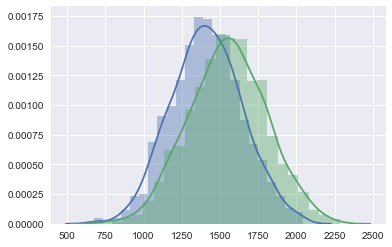

In [74]:
may_mean = sales_may.mean()
may_std = sales_may.std()

graph = sns.distplot(np.random.normal(apr_mean, apr_std, 1000))

sns.distplot(np.random.normal(may_mean, may_std, 1000), ax=graph)


In [78]:
# How to know if this is a significant difference?
# Let's try a T-test!

stats.ttest_rel(sales_april, sales_may)
# P value of under 0.05 = significant (for a 95% confidence)

Ttest_relResult(statistic=array([-33.86923423]), pvalue=array([  7.16574081e-25]))

In [79]:
# Let's use t-test independent, which allows for different dataset sizes

sales_may = pd.DataFrame([1650,1320,1485,1430,1870,1980,1650,1320,1485,1430, \
             1870,1980,1650,1320,1485,1430,1870,1980,1650,1320,1485,1430,1870])
stats.ttest_ind(sales_april, sales_may)

Ttest_indResult(statistic=array([-2.79660699]), pvalue=array([ 0.00726517]))